# 2 . Random Sample Imputation

In [1]:
import pandas as pd
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [38]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [ ]:
df['Age'].dropna().sample()

In [39]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [44]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ## It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ## pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [45]:
median=df['Age'].median()
median

28.0

In [46]:
impute_nan(df,'Age',median)

In [47]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

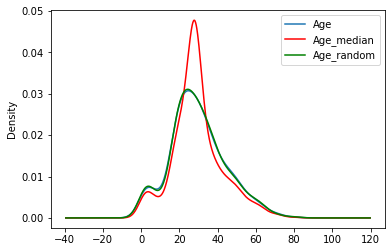

In [50]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax,color='red')
df.Age_random.plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

# 3 . Missing NaN values with a new feature

In [51]:
## MNAR - It works well if the data not missing completely at random

In [52]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [54]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [55]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [56]:
df.head(50)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


# 4 . End of Distribution Imputation

In [1]:
import pandas as pd
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

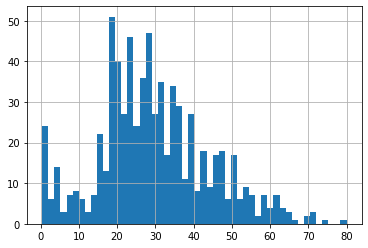

In [2]:
df['Age'].hist(bins=50)

In [3]:
df['Age'].mean()

29.69911764705882

In [6]:
extreme=df['Age'].mean()+3*df['Age'].std()
extreme

73.27860964406095

In [7]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [8]:
impute_nan(df,'Age',df['Age'].median(),extreme)

In [9]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

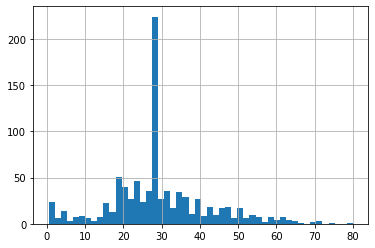

In [11]:
df['Age'].hist(bins=50)

<AxesSubplot:>

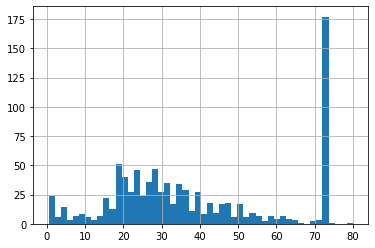

In [12]:
df['Age_end_distribution'].hist(bins=50)

# Repractice

In [1]:
import pandas as pd
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [3]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [18]:
df['Age'].dropna().sample()

378    20.0
Name: Age, dtype: float64

In [20]:
df.Age.isnull().sum()

177

In [35]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [36]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [42]:
def impute_nan(df,variable,median):
    df[variable+'_median']=df[variable].fillna(median)
    df[variable+'_random']=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+"_random"] = random_sample
    

In [43]:
median = df.Age.median()
median

28.0

In [44]:
impute_nan(df,'Age',median)

In [45]:
df.sample(15)

,Survived,Age,Fare,Age_median,Age_random
667,0,NaN,7.775,28.0,19.0
846,0,NaN,69.550,28.0,50.0
673,1,31.0,13.000,31.0,31.0
548,0,33.0,20.525,33.0,33.0
264,0,NaN,7.750,28.0,24.0
234,0,24.0,10.500,24.0,24.0
68,1,17.0,7.925,17.0,17.0
522,0,NaN,7.225,28.0,24.0
669,1,NaN,52.000,28.0,32.5
402,0,21.0,9.825,21.0,21.0


In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

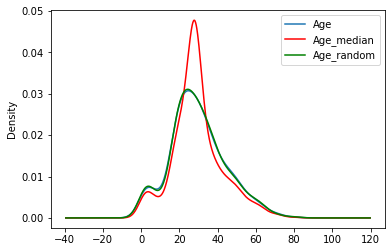

In [47]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax,color='red')
df.Age_random.plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [48]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [51]:
import numpy as np
df['Age_NaN']=np.where(df['Age'].isnull(),1,0)
df.sample(13)

,Survived,Age,Fare,Age_NaN
211,1,35.0,21.0000,0
846,0,NaN,69.5500,1
526,1,50.0,10.5000,0
191,0,19.0,13.0000,0
184,1,4.0,22.0250,0
166,1,NaN,55.0000,1
322,1,30.0,12.3500,0
587,1,60.0,79.2000,0
444,1,NaN,8.1125,1
832,0,NaN,7.2292,1


In [52]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [53]:
df.sample(13)

,Survived,Age,Fare,Age_NaN
787,0,8.0,29.1250,0
315,1,26.0,7.8542,0
470,0,28.0,7.2500,1
82,1,28.0,7.7875,1
817,0,31.0,37.0042,0
605,0,36.0,15.5500,0
131,0,20.0,7.0500,0
50,0,7.0,39.6875,0
454,0,28.0,8.0500,1
515,0,47.0,34.0208,0


In [54]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

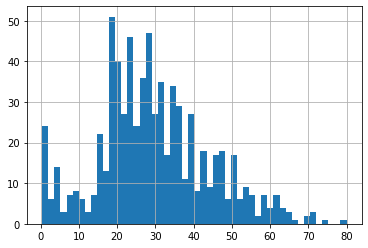

In [55]:
df.Age.hist(bins=50)

In [56]:
df.Age.mean()

29.69911764705882

In [82]:
extreme=df.Age.mean()+3*df.Age.std()
extreme

68.42067214450208

In [83]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [84]:
impute_nan(df,'Age',df['Age'].median(),extreme)
df.sample(3)

,Survived,Age,Fare,Age_end_of_distribution,Age_end_distribution
106,1,21.0,7.6500,21.0,21.0
642,0,2.0,27.9000,2.0,2.0
631,0,51.0,7.0542,51.0,51.0


<AxesSubplot:>

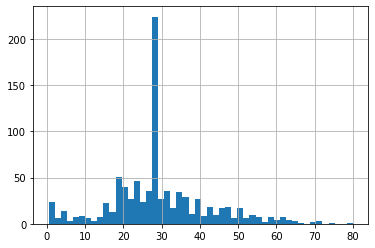

In [85]:
df['Age'].hist(bins=50)

<AxesSubplot:>

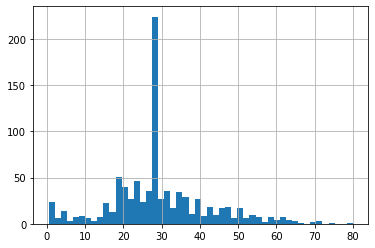

In [86]:
df['Age_end_distribution'].hist(bins=50)